# **PyTorch Classification Exercise**

In [1]:
# Check for GPU
!nvidia-smi

Sun Oct 27 15:43:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

PyTorch version: 2.5.0+cu121
torchvision version: 0.20.0+cu121


'cuda'

## **Q1 Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?**

In [3]:
# Your code here
tensor_shape = torch.rand(size=(1, 3, 64, 64))
m = nn.Conv2d(3, 10, 3, stride=1, padding=1)
output = m(tensor_shape)
print(output.shape)

torch.Size([1, 10, 64, 64])


## **Q2 Write transforms necessary for data augmentation for the `MNIST` dataset**

In [4]:
# Your code here
data_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), # convert image to grayscale
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

## **Q3 Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets**

In [5]:
# Your code here
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=data_transform, # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=data_transform
)

class_names = train_data.classes

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.55MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.19MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## **Q4 Visualize at least 5 different samples of the MNIST training dataset**

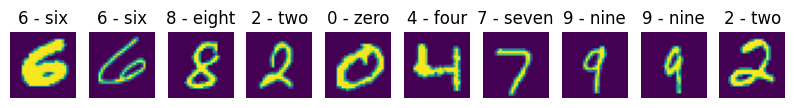

In [6]:
# Your code here
torch.manual_seed(42)
fig = plt.figure(figsize=(10,10))
for i in range(1, 11):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  fig.add_subplot(1,10,i)
  img, label = train_data[random_idx]
  plt.imshow(img.squeeze())
  plt.title(class_names[label])
  plt.axis("Off");

## **Q5 Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`**

In [7]:
# Your code here
train_dataloader= DataLoader(dataset=train_data, # use custom created train Dataset
                                     batch_size=32, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, # use custom created test Dataset
                                    batch_size=32,
                                    num_workers=0,
                                    shuffle=False) # don't usually need to shuffle testing data

train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                Grayscale(num_output_channels=1)
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                Grayscale(num_output_channels=1)
                ToTensor()
            ))

## **Q6 Create a CNN model capable of fitting on the MNIST dataset. You can select any known architecture or create a variant of your own**

In [8]:
# Your code here
class CNNModelMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(1,10,3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(10,10,3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(10,10,3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(10,10,3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10*7*7, out_features=10)
    )

  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.classifier(x)
    return x

model = CNNModelMNIST()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

model, optimizer

(CNNModelMNIST(
   (block1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (block2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

## **Q7 Train the model you built in Q5 for 5 epochs**

In [9]:
# Your code here
model.train()
epochs = 5
model = model.to(device)
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n---------")
  for batch, (X, y) in enumerate(train_dataloader):
    X=X.to(device)
    y=y.to(device)
    prediction = model(X)
    loss = loss_fn(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0
---------
Epoch: 1
---------
Epoch: 2
---------
Epoch: 3
---------
Epoch: 4
---------


## **Q8 Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label**

In [14]:
# Your code here
model.eval()
torch.manual_seed(42)
fig = plt.figure(figsize=(10,10))
with torch.inference_mode():
  for i in range(1, 11):
    random_idx = torch.randint(0, len(test_data), size=[1]).item()
    img, label = train_data[random_idx]
    prediction = model(img.unsqueeze(dim=0).to(device))
    probability = torch.softmax(prediction.squeeze(), dim=0)
    print(f"{probability}, {probability.argmax()}, {probability.max()}")
    #pred_label = class_names[probability.argmax()]
    #fig.add_subplot(1,10,i)
    #plt.imshow(img.squeeze())
    #plt.title(pred_label)
    #plt.axis("Off");


tensor([0.1030, 0.0939, 0.1040, 0.0965, 0.0991, 0.1016, 0.0998, 0.0993, 0.1026,
        0.1001], device='cuda:0'), 2, 0.10402806103229523
tensor([0.1038, 0.0933, 0.1045, 0.0970, 0.0999, 0.1013, 0.0992, 0.0984, 0.1019,
        0.1007], device='cuda:0'), 2, 0.10451270639896393
tensor([0.1032, 0.0937, 0.1045, 0.0970, 0.0993, 0.1012, 0.0998, 0.0984, 0.1025,
        0.1005], device='cuda:0'), 2, 0.1044716015458107
tensor([0.1036, 0.0933, 0.1045, 0.0965, 0.0995, 0.1013, 0.1004, 0.0984, 0.1021,
        0.1004], device='cuda:0'), 2, 0.10445484519004822
tensor([0.1032, 0.0941, 0.1045, 0.0970, 0.0991, 0.1013, 0.0992, 0.0986, 0.1020,
        0.1009], device='cuda:0'), 2, 0.1044858992099762
tensor([0.1034, 0.0932, 0.1048, 0.0972, 0.0995, 0.1012, 0.0993, 0.0986, 0.1022,
        0.1006], device='cuda:0'), 2, 0.10479122400283813
tensor([0.1039, 0.0937, 0.1043, 0.0966, 0.0996, 0.1011, 0.0993, 0.0986, 0.1023,
        0.1005], device='cuda:0'), 2, 0.10433141142129898
tensor([0.1035, 0.0936, 0.1049, 0.09

<Figure size 1000x1000 with 0 Axes>

## **Q9 Plot a confusion matrix comparing your model's predictions to the truth labels**



In [ ]:
# Your code here

## **Q10 Result Analysis**
* Plot some predictions from the test_data above where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a **modelling error** or a **data error**?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "7" label is too close to "2")?

In [ ]:
# Your code here